In [1]:
%matplotlib inline
import networkx as nx

# グラフとは？

In [2]:
# 有向グラフを作る
G1 = nx.DiGraph()

In [3]:
# 孤を追加する
G1.add_edges_from([(1, 2), (2, 3), (2, 4), (2, 5), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2)])

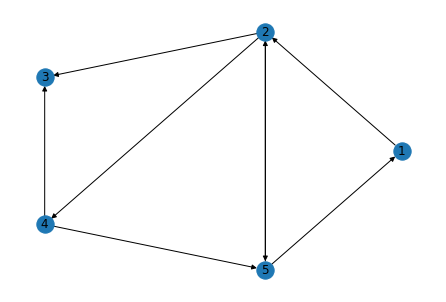

In [4]:
# G1の描画 ((4, 4) はうまく描かれない)
nx.draw_circular(G1, arrows=True, with_labels=True)

In [5]:
# 頂点数
G1.number_of_nodes()

5

In [6]:
# 孤数
G1.number_of_edges()

9

In [7]:
# 無向グラフを作る
G2 = nx.Graph()

In [8]:
# 辺を追加する
G2.add_edges_from([(1, 2), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (4, 5)])

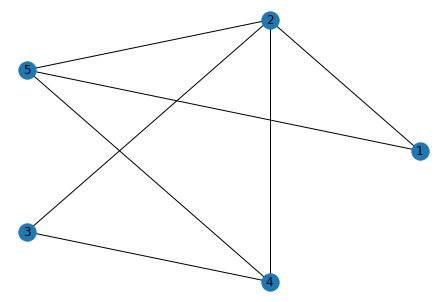

In [9]:
# G2の描画
nx.draw_circular(G2, with_labels = True)

In [10]:
# 頂点数
G2.number_of_nodes()

5

In [11]:
# 辺数
G2.number_of_edges()

7

# 同型なグラフ

In [12]:
from networkx.algorithms import isomorphism

In [13]:
G3 = nx.DiGraph()
G3.add_edges_from([('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('D', 'C'), ('D', 'D'), ('D', 'E'), ('E', 'A'), ('E', 'B')])

In [14]:
# 同型性の判定
isomorphism.is_isomorphic(G1, G3)

True

In [15]:
# 同型写像の出力
GM = isomorphism.GraphMatcher(G1, G3)
GM.is_isomorphic()
GM.mapping

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E'}

In [16]:
G4 = nx.Graph()
G4.add_edges_from([('A', 'B'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('D', 'C'), ('D', 'E')])

In [17]:
GM = isomorphism.GraphMatcher(G2, G4)
GM.is_isomorphic()

True

In [18]:
GM.mapping

{1: 'A', 2: 'B', 5: 'E', 3: 'C', 4: 'D'}

In [19]:
# 例題1
H1 = nx.Graph()
H1.add_edges_from([(1, 2), (1, 7), (2, 3), (2, 7), (3, 4), (3, 6), (4, 5), (5, 6), (6, 7)])
H2 = nx.Graph()
H2.add_edges_from([(1, 4), (1, 5), (2, 5), (2, 6), (2, 7), (3, 6), (3, 7), (4, 5), (4, 7)])
GM = isomorphism.GraphMatcher(H1, H2)
GM.is_isomorphic()

True

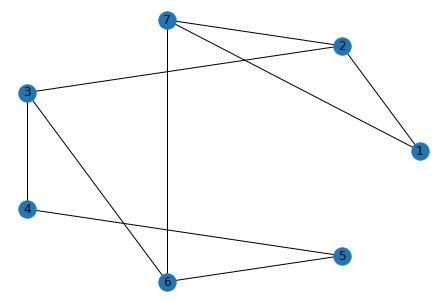

In [20]:
nx.draw_circular(H1, with_labels=True)

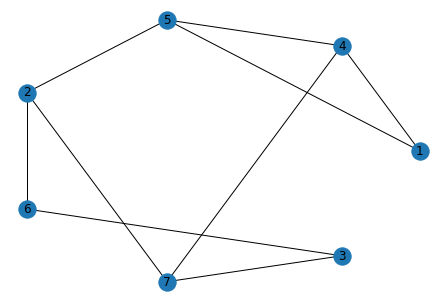

In [21]:
nx.draw_circular(H2, with_labels=True)

In [22]:
GM = isomorphism.GraphMatcher(H1, H2)
GM.is_isomorphic()

True

In [23]:
GM.mapping

{1: 1, 2: 4, 7: 5, 6: 2, 5: 6, 3: 7, 4: 3}

In [24]:
# 例題2
H3 = nx.DiGraph()
H3.add_edges_from([(1, 2), (1, 4), (2, 3), (2, 5), (3, 4), (3, 6), (4, 5), (4, 7), (5, 1), (5, 6), (6, 2), (6, 7), (7, 1), (7, 3)])
H4 = nx.DiGraph()
H4.add_edges_from([(1, 3), (1, 5), (2, 3), (2, 6), (3, 4), (3, 7), (4, 2), (4, 5), (5, 6), (5, 7), (6, 4), (6, 1), (7, 1), (7, 2)])

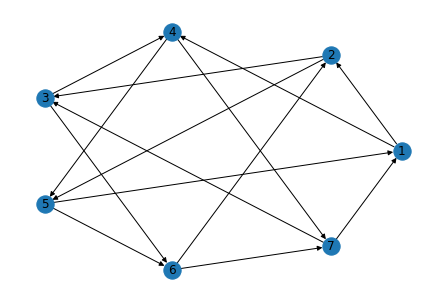

In [25]:
nx.draw_circular(H3, arrows=True, with_labels=True)

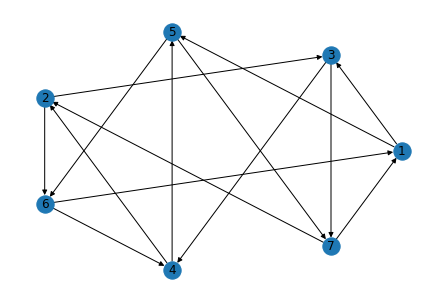

In [26]:
nx.draw_circular(H4, arrows=True, with_labels=True)

In [27]:
GM = isomorphism.GraphMatcher(H3, H4)
GM.is_isomorphic()

True

In [28]:
GM.mapping

{1: 1, 2: 3, 4: 5, 7: 6, 3: 4, 6: 2, 5: 7}

# グラフの次数

In [29]:
# 次数の列
G2.degree()

DegreeView({1: 2, 2: 4, 5: 3, 3: 2, 4: 3})

In [30]:
# 入次数の列
G1.in_degree()

InDegreeView({1: 1, 2: 2, 3: 2, 4: 2, 5: 2})

In [31]:
# 出次数の列
G1.out_degree()

OutDegreeView({1: 1, 2: 3, 3: 0, 4: 3, 5: 2})

In [32]:
# 次数和の計算
def degree_sum(G):
    return sum(dict(G.degree()).values())

In [33]:
degree_sum(G2)

14

In [34]:
# 握手補題の確認
2 * G2.number_of_edges() == degree_sum(G2)

True

In [35]:
# 入次数和の計算
def in_degree_sum(G):
    return sum(dict(G.in_degree()).values())

In [36]:
in_degree_sum(G1)

9

In [37]:
# 握手補題 (入次数版) の確認
G1.number_of_edges() == in_degree_sum(G1)

True

In [38]:
# 出次数和の計算
def out_degree_sum(G):
    return sum(dict(G1.out_degree()).values())

In [39]:
out_degree_sum(G1)

9

In [40]:
# 握手補題 (出次数版) の確認
G1.number_of_edges() == out_degree_sum(G1)

True

In [41]:
# 最大次数
def max_degree(G):
    return max(dict(G.degree()).values())

In [42]:
max_degree(G2)

4

In [43]:
# 最小次数
def min_degree(G):
    return min(dict(G.degree()).values())

In [44]:
min_degree(G2)

2

In [45]:
# 最大入次数
def max_in_degree(G):
    return max(dict(G.in_degree()).values())

In [46]:
max_in_degree(G1)

2

In [47]:
# 最小入次数
def min_in_degree(G):
    return min(dict(G.in_degree()).values())

In [48]:
min_in_degree(G1)

1

In [49]:
# 最大出次数
def max_out_degree(G):
    return max(dict(G.out_degree()).values())

In [50]:
max_out_degree(G1)

3

In [51]:
# 最小出次数
def min_out_degree(G):
    return min(dict(G.in_degree()).values())

In [52]:
min_out_degree(G1)

1